# ANN Influenza Analysis

1) Autoregressive Model - Random Forest / Linear Regression

2) Model considering external variable (Temperature average by year)



### Installing packages and importing libraries

In [ ]:
!pip install git+https://github.com/JoaquinAmatRodrigo/skforecast.git

  Cloning https://github.com/JoaquinAmatRodrigo/skforecast.git to /tmp/pip-req-build-5om_7syj
  Running command git clone -q https://github.com/JoaquinAmatRodrigo/skforecast.git /tmp/pip-req-build-5om_7syj
  Created wheel for skforecast: filename=skforecast-0.1.8.1-cp37-none-any.whl size=25670 sha256=077ab2c5d043569c940c6b854e50435c50c84626e9dd2abaa25391da7fc97b28
  Stored in directory: /tmp/pip-ephem-wheel-cache-yamrlj9v/wheels/b9/4f/77/4fd73ca95126554f873aab07ad02a86efcfbfd29515bf2d74e
Successfully built skforecast


In [ ]:
!pip install git+https://github.com/JoaquinAmatRodrigo/skforecast#master

  Cloning https://github.com/JoaquinAmatRodrigo/skforecast to /tmp/pip-req-build-xlaf6alm
  Running command git clone -q https://github.com/JoaquinAmatRodrigo/skforecast /tmp/pip-req-build-xlaf6alm
  Created wheel for skforecast: filename=skforecast-0.1.8.1-cp37-none-any.whl size=25670 sha256=169ce9df0c68d30c252feee70a3cd24dad20def1c0edf816f9ef71fc085b72ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-hzs47y6s/wheels/8f/a4/40/32825d64d0211420d1a18936770015b3576d88aed87be6d640
Successfully built skforecast


In [ ]:
!pip install tqdm

In [ ]:
!pip install git+https://github.com/scikit-learn/scikit-learn.git

  Cloning https://github.com/scikit-learn/scikit-learn.git to /tmp/pip-req-build-63rnod1s
  Running command git clone -q https://github.com/scikit-learn/scikit-learn.git /tmp/pip-req-build-63rnod1s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn: filename=scikit_learn-1.0.dev0-cp37-cp37m-linux_x86_64.whl size=18481052 sha256=bc53d6c01fb75024160161e50b954ec1f011deb7cb9084d1e1b1321623381a59
  Stored in directory: /tmp/pip-ephem-wheel-cache-aje7s_k5/wheels/7a/25/c4/63026649a3d39acb6ae783b2c72fcbe96f4ed2aa61c33edc1b
Successfully built scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterCustom import ForecasterCustom
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import time_series_spliter
from skforecast.model_selection import cv_forecaster
from skforecast.model_selection import backtesting_forecaster_intervals

### Uploading influenza data

In [ ]:
decesos = pd.read_excel('Influenza_data_relative.xlsx',sheet_name='DataTable')
decesos

,Año,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Cataluña,CLM,CyL,CValenciana,Extremadura,Galicia,Madrid,Murcia,Navarra,País Vasco,La Rioja,Ceuta,Melilla
0,2000,3.16,3.65,8.35,3.88,1.43,6.33,4.45,3.43,5.16,2.32,1.32,6.86,0.97,3.91,5.82,3.72,3.65,2.83,0.00
1,2001,0.27,0.50,0.20,0.00,0.59,0.74,0.49,0.56,0.49,0.29,0.38,0.94,0.23,0.00,0.00,0.48,0.00,0.00,0.00
2,2002,1.13,1.98,5.94,0.92,0.23,0.00,1.50,3.48,3.24,1.44,1.88,2.12,0.82,0.81,2.13,1.53,3.55,0.00,0.00
3,2003,0.58,1.13,3.20,0.00,0.22,0.36,0.68,1.65,1.78,0.64,0.75,2.10,0.42,0.16,0.70,0.76,1.39,0.00,3.08
4,2004,0.16,0.64,1.28,0.22,0.00,0.00,0.44,0.54,0.81,0.26,0.19,1.67,0.24,0.00,0.35,0.10,0.00,0.00,0.00
5,2005,1.48,6.63,6.33,1.88,0.86,2.13,3.48,4.12,3.51,1.51,3.17,2.40,0.92,2.09,5.09,2.99,5.33,0.00,0.00
6,2006,0.08,0.16,0.38,1.22,0.10,0.35,0.28,0.31,0.00,0.17,0.00,0.87,0.03,0.00,0.33,0.18,0.65,0.00,0.00
7,2007,0.15,0.62,1.29,0.39,0.30,0.71,0.30,0.30,0.39,0.20,0.18,0.87,0.13,0.00,0.00,0.46,0.65,0.00,0.00
8,2008,0.17,0.60,1.65,0.19,0.20,0.00,0.35,0.10,0.71,0.16,0.00,0.94,0.25,0.14,0.32,0.55,0.62,0.00,2.73
9,2009,1.50,1.34,2.40,0.74,0.79,1.37,1.05,1.64,1.57,1.20,0.73,1.49,0.77,1.79,1.59,0.55,2.50,5.23,2.64


In [ ]:
#Setting year format
decesos['Año'] = pd.to_datetime(decesos['Año'], format='%Y')
#Setting year as index
decesos = decesos.set_index('Año')

In [ ]:
decesos

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Cataluña,CLM,CyL,CValenciana,Extremadura,Galicia,Madrid,Murcia,Navarra,País Vasco,La Rioja,Ceuta,Melilla
Año,,,,,,,,,,,,,,,,,,,
2000-01-01,3.16,3.65,8.35,3.88,1.43,6.33,4.45,3.43,5.16,2.32,1.32,6.86,0.97,3.91,5.82,3.72,3.65,2.83,0.00
2001-01-01,0.27,0.50,0.20,0.00,0.59,0.74,0.49,0.56,0.49,0.29,0.38,0.94,0.23,0.00,0.00,0.48,0.00,0.00,0.00
2002-01-01,1.13,1.98,5.94,0.92,0.23,0.00,1.50,3.48,3.24,1.44,1.88,2.12,0.82,0.81,2.13,1.53,3.55,0.00,0.00
2003-01-01,0.58,1.13,3.20,0.00,0.22,0.36,0.68,1.65,1.78,0.64,0.75,2.10,0.42,0.16,0.70,0.76,1.39,0.00,3.08
2004-01-01,0.16,0.64,1.28,0.22,0.00,0.00,0.44,0.54,0.81,0.26,0.19,1.67,0.24,0.00,0.35,0.10,0.00,0.00,0.00
2005-01-01,1.48,6.63,6.33,1.88,0.86,2.13,3.48,4.12,3.51,1.51,3.17,2.40,0.92,2.09,5.09,2.99,5.33,0.00,0.00
2006-01-01,0.08,0.16,0.38,1.22,0.10,0.35,0.28,0.31,0.00,0.17,0.00,0.87,0.03,0.00,0.33,0.18,0.65,0.00,0.00
2007-01-01,0.15,0.62,1.29,0.39,0.30,0.71,0.30,0.30,0.39,0.20,0.18,0.87,0.13,0.00,0.00,0.46,0.65,0.00,0.00
2008-01-01,0.17,0.60,1.65,0.19,0.20,0.00,0.35,0.10,0.71,0.16,0.00,0.94,0.25,0.14,0.32,0.55,0.62,0.00,2.73


In [ ]:
#Renaming variables (X: independent variable - year / Y: dependent variable - deaths cases by 100.000 habitants)
decesos = decesos.rename(columns={'x': 'y'})
decesos

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Cataluña,CLM,CyL,CValenciana,Extremadura,Galicia,Madrid,Murcia,Navarra,País Vasco,La Rioja,Ceuta,Melilla
Año,,,,,,,,,,,,,,,,,,,
2000-01-01,3.16,3.65,8.35,3.88,1.43,6.33,4.45,3.43,5.16,2.32,1.32,6.86,0.97,3.91,5.82,3.72,3.65,2.83,0.00
2001-01-01,0.27,0.50,0.20,0.00,0.59,0.74,0.49,0.56,0.49,0.29,0.38,0.94,0.23,0.00,0.00,0.48,0.00,0.00,0.00
2002-01-01,1.13,1.98,5.94,0.92,0.23,0.00,1.50,3.48,3.24,1.44,1.88,2.12,0.82,0.81,2.13,1.53,3.55,0.00,0.00
2003-01-01,0.58,1.13,3.20,0.00,0.22,0.36,0.68,1.65,1.78,0.64,0.75,2.10,0.42,0.16,0.70,0.76,1.39,0.00,3.08
2004-01-01,0.16,0.64,1.28,0.22,0.00,0.00,0.44,0.54,0.81,0.26,0.19,1.67,0.24,0.00,0.35,0.10,0.00,0.00,0.00
2005-01-01,1.48,6.63,6.33,1.88,0.86,2.13,3.48,4.12,3.51,1.51,3.17,2.40,0.92,2.09,5.09,2.99,5.33,0.00,0.00
2006-01-01,0.08,0.16,0.38,1.22,0.10,0.35,0.28,0.31,0.00,0.17,0.00,0.87,0.03,0.00,0.33,0.18,0.65,0.00,0.00
2007-01-01,0.15,0.62,1.29,0.39,0.30,0.71,0.30,0.30,0.39,0.20,0.18,0.87,0.13,0.00,0.00,0.46,0.65,0.00,0.00
2008-01-01,0.17,0.60,1.65,0.19,0.20,0.00,0.35,0.10,0.71,0.16,0.00,0.94,0.25,0.14,0.32,0.55,0.62,0.00,2.73


In [ ]:
#Setting annual frequency
decesos = decesos.asfreq('AS')

In [ ]:
decesos

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Cataluña,CLM,CyL,CValenciana,Extremadura,Galicia,Madrid,Murcia,Navarra,País Vasco,La Rioja,Ceuta,Melilla
Año,,,,,,,,,,,,,,,,,,,
2000-01-01,3.16,3.65,8.35,3.88,1.43,6.33,4.45,3.43,5.16,2.32,1.32,6.86,0.97,3.91,5.82,3.72,3.65,2.83,0.00
2001-01-01,0.27,0.50,0.20,0.00,0.59,0.74,0.49,0.56,0.49,0.29,0.38,0.94,0.23,0.00,0.00,0.48,0.00,0.00,0.00
2002-01-01,1.13,1.98,5.94,0.92,0.23,0.00,1.50,3.48,3.24,1.44,1.88,2.12,0.82,0.81,2.13,1.53,3.55,0.00,0.00
2003-01-01,0.58,1.13,3.20,0.00,0.22,0.36,0.68,1.65,1.78,0.64,0.75,2.10,0.42,0.16,0.70,0.76,1.39,0.00,3.08
2004-01-01,0.16,0.64,1.28,0.22,0.00,0.00,0.44,0.54,0.81,0.26,0.19,1.67,0.24,0.00,0.35,0.10,0.00,0.00,0.00
2005-01-01,1.48,6.63,6.33,1.88,0.86,2.13,3.48,4.12,3.51,1.51,3.17,2.40,0.92,2.09,5.09,2.99,5.33,0.00,0.00
2006-01-01,0.08,0.16,0.38,1.22,0.10,0.35,0.28,0.31,0.00,0.17,0.00,0.87,0.03,0.00,0.33,0.18,0.65,0.00,0.00
2007-01-01,0.15,0.62,1.29,0.39,0.30,0.71,0.30,0.30,0.39,0.20,0.18,0.87,0.13,0.00,0.00,0.46,0.65,0.00,0.00
2008-01-01,0.17,0.60,1.65,0.19,0.20,0.00,0.35,0.10,0.71,0.16,0.00,0.94,0.25,0.14,0.32,0.55,0.62,0.00,2.73


In [ ]:
#Selecting "Aragon" data as example
andalucia = decesos['Andalucía']
aragon = decesos['Aragón']
asturias = decesos['Asturias']
baleares = decesos['Baleares']
canarias = decesos['Canarias']
cantabria = decesos['Cantabria']
catalunya = decesos['Cataluña']
clm = decesos['CLM']
cyl = decesos['CyL']
cvalencia = decesos['CValenciana']
extremadura = decesos['Extremadura']
galicia = decesos['Galicia']
madrid = decesos['Madrid']
murcia = decesos['Murcia']
navarra = decesos['Navarra']
pvasco = decesos['País Vasco']
lrioja = decesos['La Rioja']
ceuta = decesos['Ceuta']
melilla = decesos['Melilla']
#ordering index



In [ ]:
lrioja

Año
2000-01-01    3.65
2001-01-01    0.00
2002-01-01    3.55
2003-01-01    1.39
2004-01-01    0.00
2005-01-01    5.33
2006-01-01    0.65
2007-01-01    0.65
2008-01-01    0.62
2009-01-01    2.50
2010-01-01    0.00
2011-01-01    3.12
2012-01-01    3.75
2013-01-01    0.00
2014-01-01    2.56
2015-01-01    1.92
2016-01-01    2.56
2017-01-01    2.55
2018-01-01    8.31
Freq: AS-JAN, Name: La Rioja, dtype: float64

In [ ]:
#Checking time index is completed
(decesos.index == pd.date_range(start=decesos.index.min(),
                              end=decesos.index.max(),
                              freq=decesos.index.freq)).all()

True

In [ ]:
steps = 3
decesos_train = decesos[:-steps]
decesos_test  = decesos[-steps:]

In [ ]:
decesos_train

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Cataluña,CLM,CyL,CValenciana,Extremadura,Galicia,Madrid,Murcia,Navarra,País Vasco,La Rioja,Ceuta,Melilla
Año,,,,,,,,,,,,,,,,,,,
2000-01-01,3.16,3.65,8.35,3.88,1.43,6.33,4.45,3.43,5.16,2.32,1.32,6.86,0.97,3.91,5.82,3.72,3.65,2.83,0.00
2001-01-01,0.27,0.50,0.20,0.00,0.59,0.74,0.49,0.56,0.49,0.29,0.38,0.94,0.23,0.00,0.00,0.48,0.00,0.00,0.00
2002-01-01,1.13,1.98,5.94,0.92,0.23,0.00,1.50,3.48,3.24,1.44,1.88,2.12,0.82,0.81,2.13,1.53,3.55,0.00,0.00
2003-01-01,0.58,1.13,3.20,0.00,0.22,0.36,0.68,1.65,1.78,0.64,0.75,2.10,0.42,0.16,0.70,0.76,1.39,0.00,3.08
2004-01-01,0.16,0.64,1.28,0.22,0.00,0.00,0.44,0.54,0.81,0.26,0.19,1.67,0.24,0.00,0.35,0.10,0.00,0.00,0.00
2005-01-01,1.48,6.63,6.33,1.88,0.86,2.13,3.48,4.12,3.51,1.51,3.17,2.40,0.92,2.09,5.09,2.99,5.33,0.00,0.00
2006-01-01,0.08,0.16,0.38,1.22,0.10,0.35,0.28,0.31,0.00,0.17,0.00,0.87,0.03,0.00,0.33,0.18,0.65,0.00,0.00
2007-01-01,0.15,0.62,1.29,0.39,0.30,0.71,0.30,0.30,0.39,0.20,0.18,0.87,0.13,0.00,0.00,0.46,0.65,0.00,0.00
2008-01-01,0.17,0.60,1.65,0.19,0.20,0.00,0.35,0.10,0.71,0.16,0.00,0.94,0.25,0.14,0.32,0.55,0.62,0.00,2.73


In [ ]:
decesos_test

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Cataluña,CLM,CyL,CValenciana,Extremadura,Galicia,Madrid,Murcia,Navarra,País Vasco,La Rioja,Ceuta,Melilla
Año,,,,,,,,,,,,,,,,,,,
2016-01-01,1.85,3.35,5.21,2.62,3.74,4.11,4.23,4.31,1.97,2.15,1.29,3.19,1.28,3.54,4.08,3.15,2.56,7.04,0.0
2017-01-01,3.05,8.05,9.22,4.15,2.77,6.13,7.42,6.51,6.85,4.00,3.36,5.16,3.07,2.85,10.92,9.19,2.55,0.00,0.0
2018-01-01,6.65,9.70,3.45,7.99,4.85,14.52,10.54,7.19,7.77,10.21,2.99,9.63,3.54,12.17,7.75,11.55,8.31,7.11,0.0


2021-05-25 21:35:43,509 matplotlib.font_manager WARNING findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
2021-05-25 21:35:43,551 matplotlib.font_manager WARNING findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


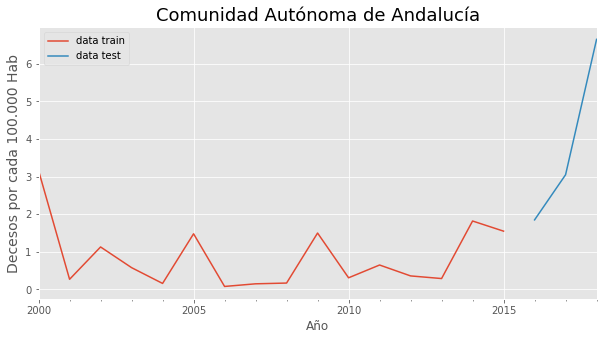

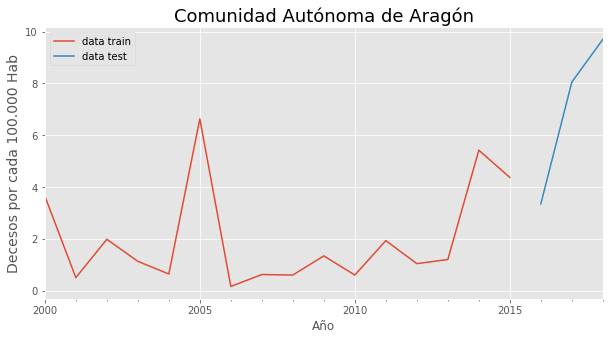

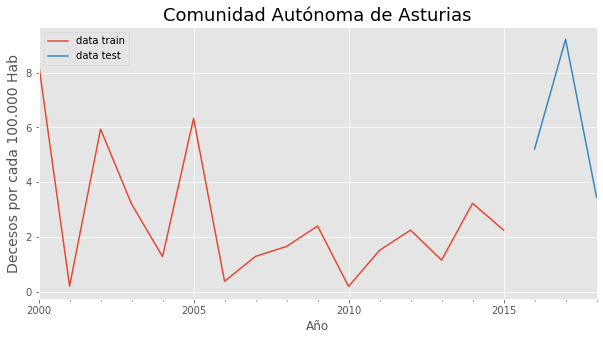

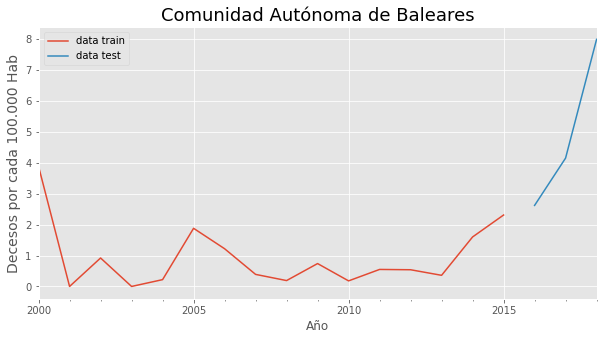

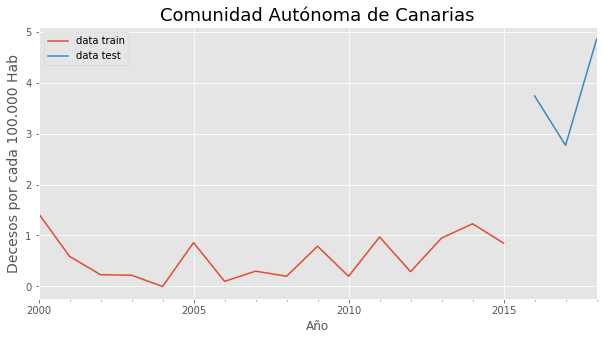

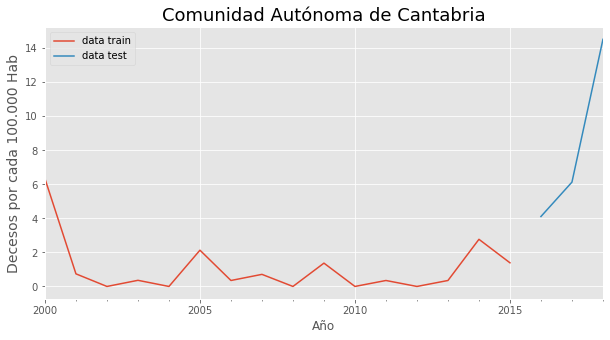

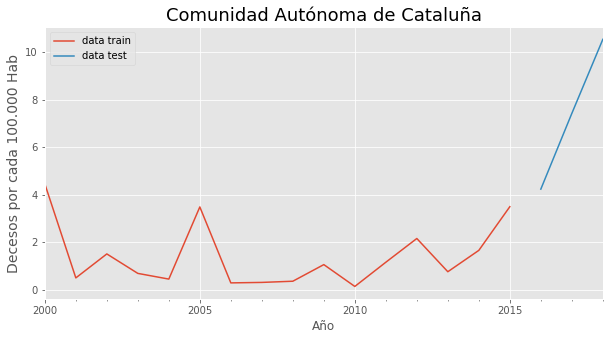

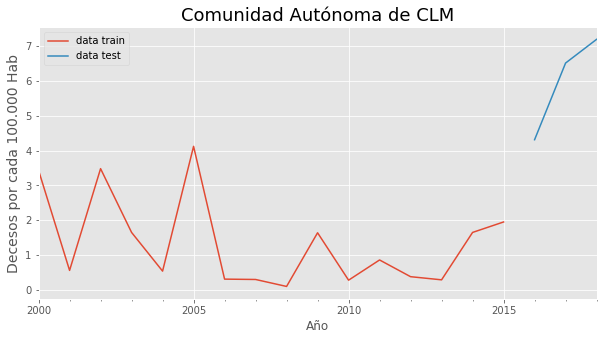

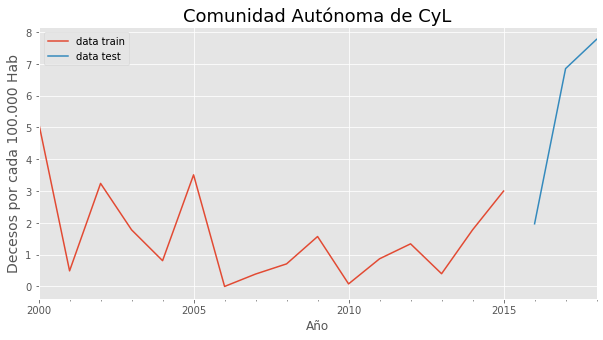

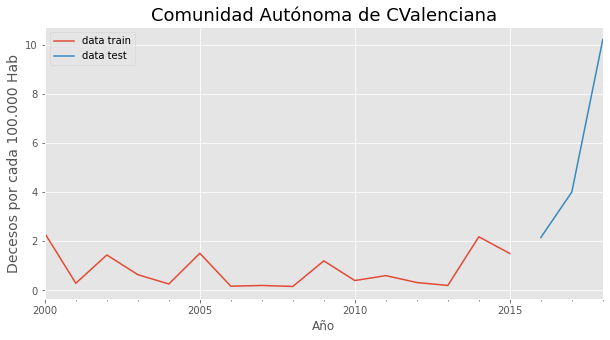

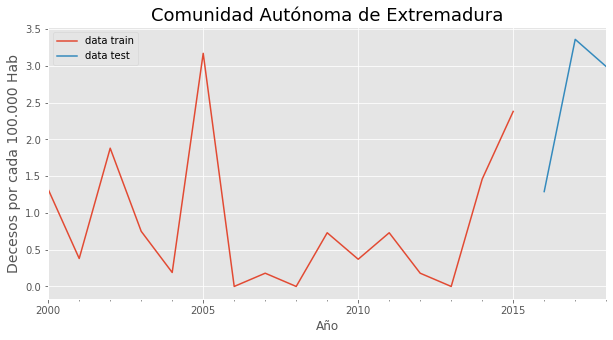

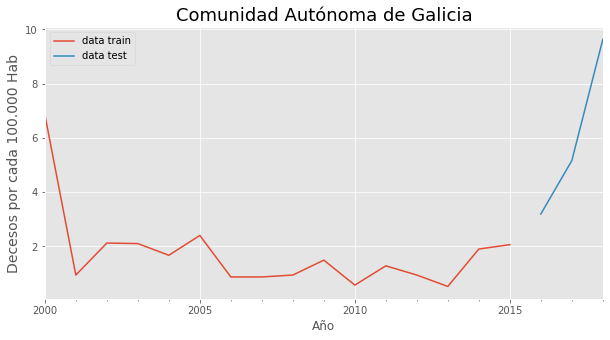

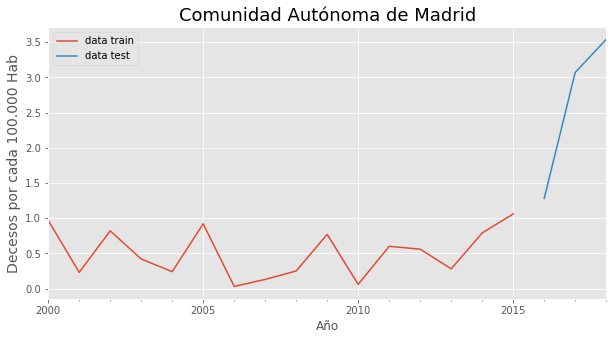

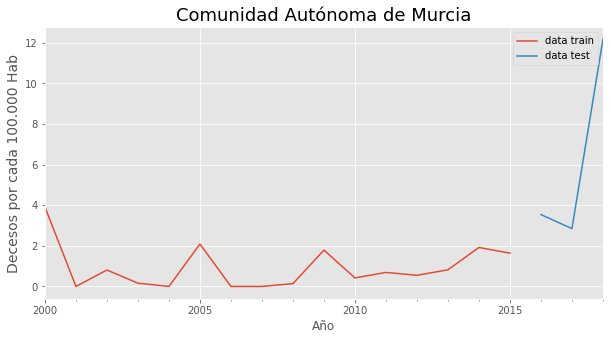

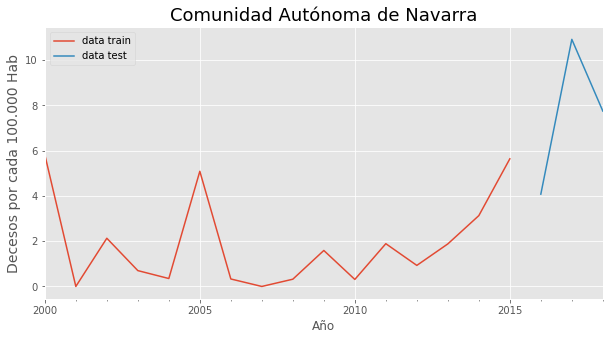

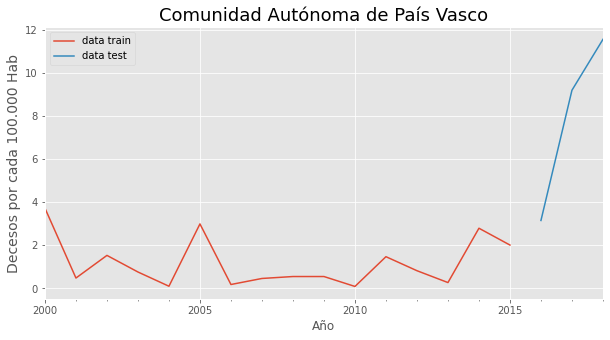

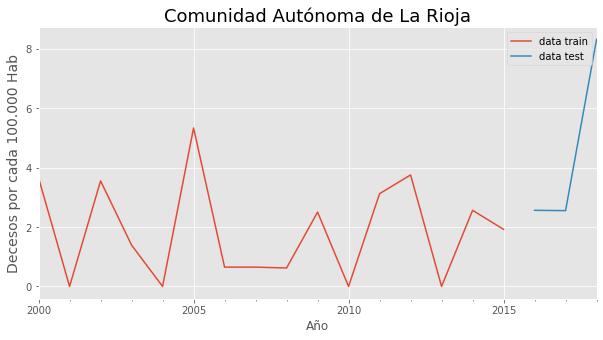

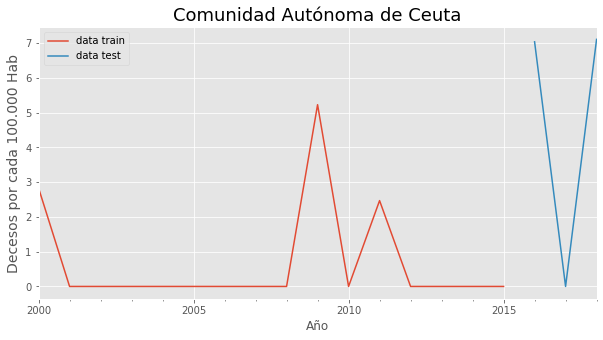

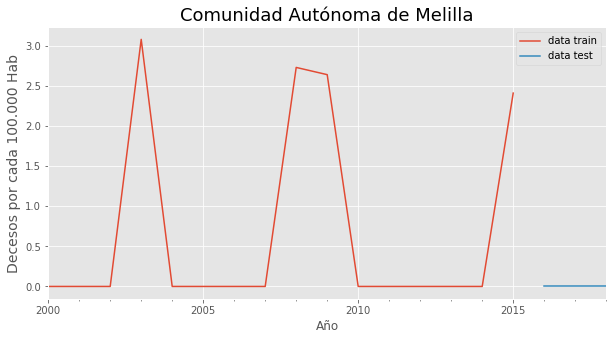

In [ ]:
for col in decesos.columns:
  plt.style.use('ggplot')
  fig, ax=plt.subplots(figsize=(10, 5))
  ax.set_title("Comunidad Autónoma de " + str(col), fontsize=18, fontfamily='Verdana')
  ax.set_ylabel('Decesos por cada 100.000 Hab', fontsize=14, fontfamily='Verdana')
  decesos_train[col].plot(ax=ax, label='data train')
  decesos_test[col].plot(ax=ax, label='data test')
  ax.legend();

In [ ]:
#Creating and training model by using RandomForestRegressor with time window
#of 3 lags
forecaster_rf = ForecasterAutoreg(
                    regressor=RandomForestRegressor(random_state=7),
                    lags=3
                )


In [ ]:
pred=[]
for col in decesos.columns:
  forecaster_rf.fit(y=decesos_train[col])
  predicciones = forecaster_rf.predict(steps=steps)
  pred.append(pd.Series(data=predicciones, index=decesos_test.index))
  print(col)
  print(pd.Series(data=predicciones, index=decesos_test.index))

Andalucía
Año
2016-01-01    0.4131
2017-01-01    0.7059
2018-01-01    0.6429
Freq: AS-JAN, dtype: float64
Aragón
Año
2016-01-01    2.4350
2017-01-01    3.6519
2018-01-01    3.6852
Freq: AS-JAN, dtype: float64
Asturias
Año
2016-01-01    1.6718
2017-01-01    2.2042
2018-01-01    1.3417
Freq: AS-JAN, dtype: float64
Baleares
Año
2016-01-01    1.1908
2017-01-01    0.4663
2018-01-01    0.3626
Freq: AS-JAN, dtype: float64
Canarias
Año
2016-01-01    0.7869
2017-01-01    0.5645
2018-01-01    0.7682
Freq: AS-JAN, dtype: float64
Cantabria
Año
2016-01-01    1.0044
2017-01-01    0.1726
2018-01-01    0.3363
Freq: AS-JAN, dtype: float64
Cataluña
Año
2016-01-01    0.6839
2017-01-01    2.3517
2018-01-01    2.1728
Freq: AS-JAN, dtype: float64
CLM
Año
2016-01-01    1.4148
2017-01-01    1.3184
2018-01-01    0.9349
Freq: AS-JAN, dtype: float64
CyL
Año
2016-01-01    1.0812
2017-01-01    1.9744
2018-01-01    1.8641
Freq: AS-JAN, dtype: float64
CValenciana
Año
2016-01-01    0.4871
2017-01-01    0.5976
2018-01

In [ ]:
pred = pd.DataFrame(pred, index=decesos.columns)
pred

Año,2016-01-01,2017-01-01,2018-01-01
Andalucía,0.413100,0.705900,0.642900
Aragón,2.435000,3.651900,3.685200
Asturias,1.671800,2.204200,1.341700
Baleares,1.190800,0.466300,0.362600
Canarias,0.786900,0.564500,0.768200
Cantabria,1.004400,0.172600,0.336300
Cataluña,0.683900,2.351700,2.172800
CLM,1.414800,1.318400,0.934900
CyL,1.081200,1.974400,1.864100
CValenciana,0.487100,0.597600,0.553400


In [ ]:
pred_T = pred.T
pred_T

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Cataluña,CLM,CyL,CValenciana,Extremadura,Galicia,Madrid,Murcia,Navarra,País Vasco,La Rioja,Ceuta,Melilla
Año,,,,,,,,,,,,,,,,,,,
2016-01-01,0.4131,2.4350,1.6718,1.1908,0.7869,1.0044,0.6839,1.4148,1.0812,0.4871,1.2321,1.4732,0.3427,1.4613,4.0903,0.4978,0.4700,0.709054,1.619669
2017-01-01,0.7059,3.6519,2.2042,0.4663,0.5645,0.1726,2.3517,1.3184,1.9744,0.5976,1.2865,1.1923,0.6282,1.1258,4.2122,1.0127,2.3594,0.709054,0.405982
2018-01-01,0.6429,3.6852,1.3417,0.3626,0.7682,0.3363,2.1728,0.9349,1.8641,0.5534,2.1638,0.9241,0.6894,1.0941,3.9649,1.3066,1.0075,0.709054,0.000000


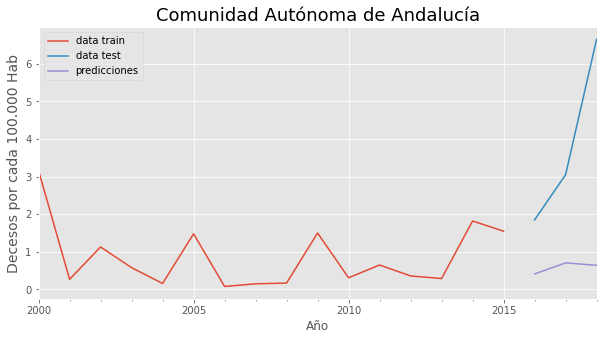

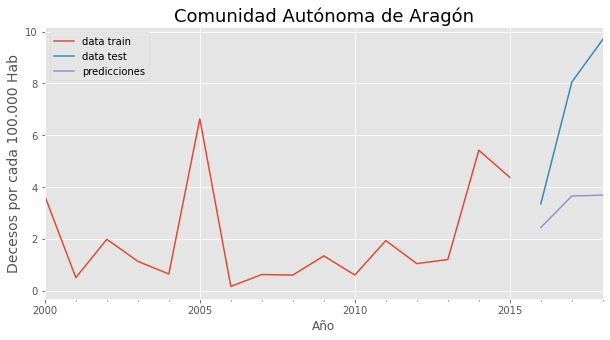

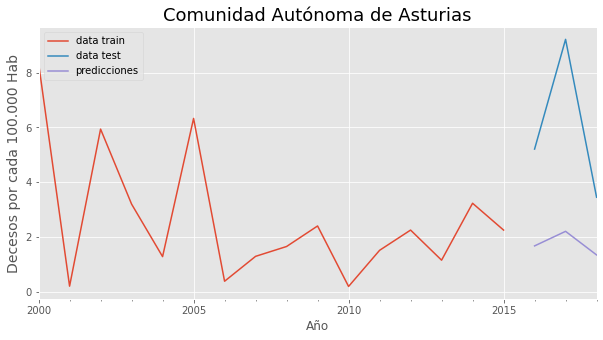

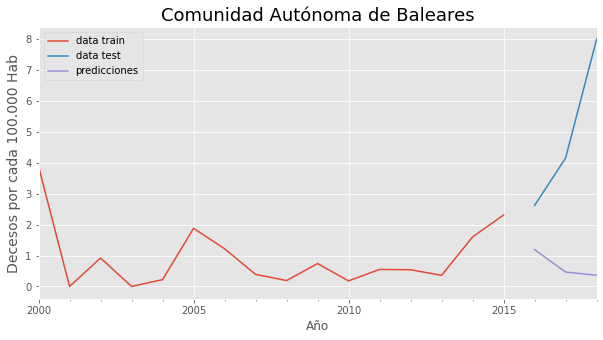

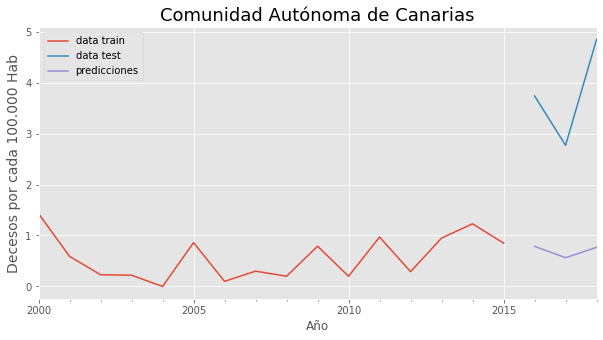

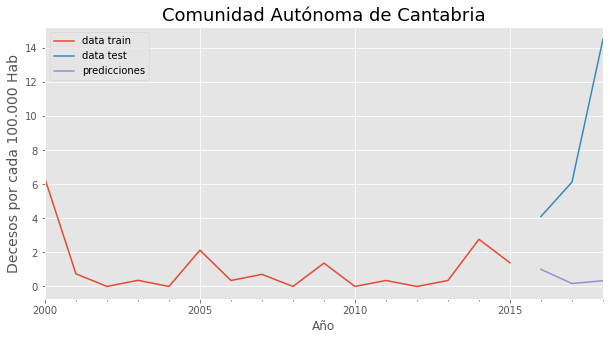

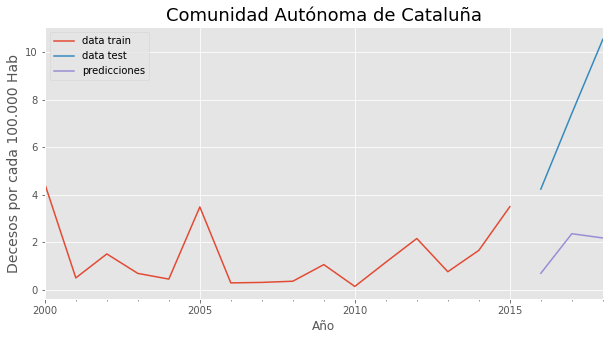

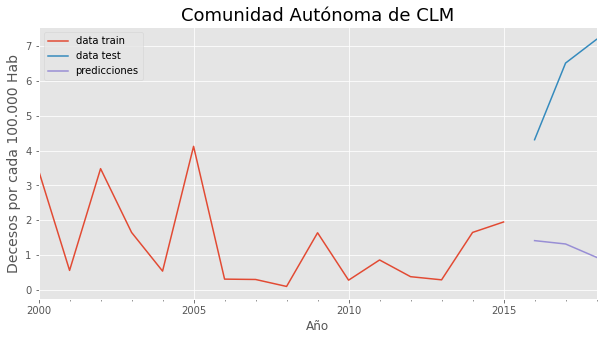

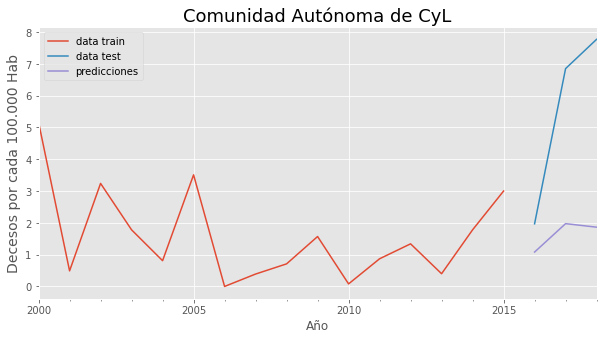

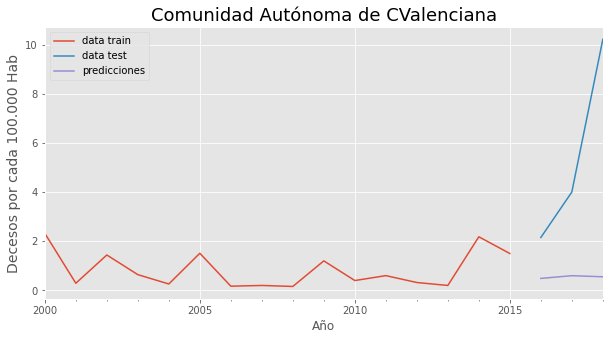

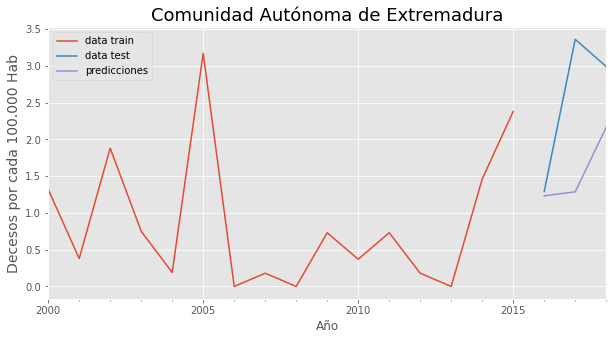

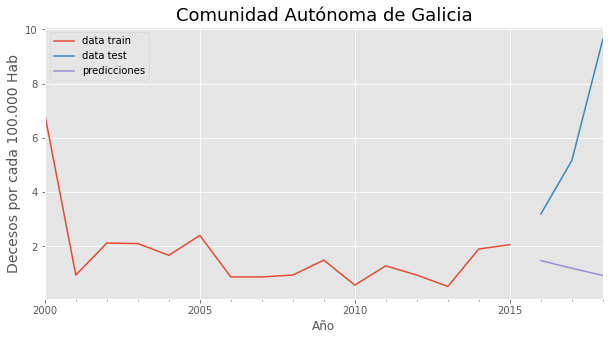

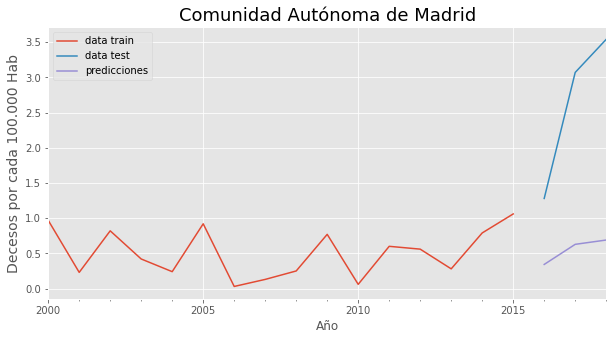

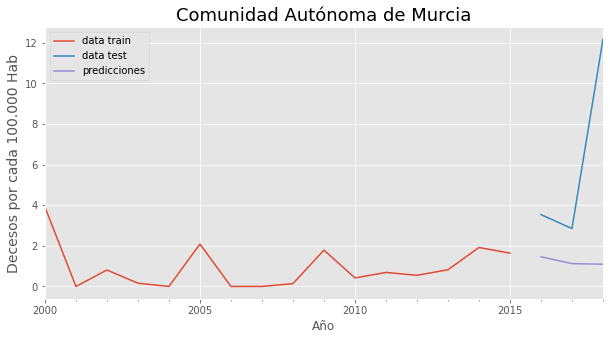

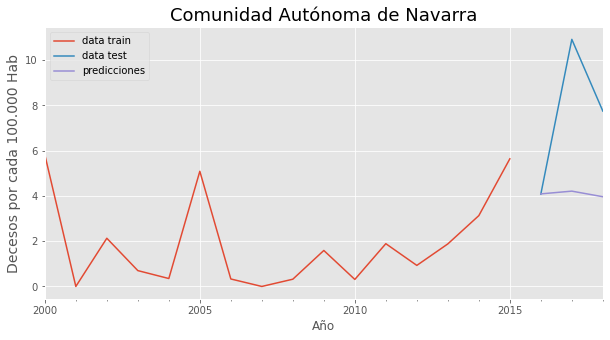

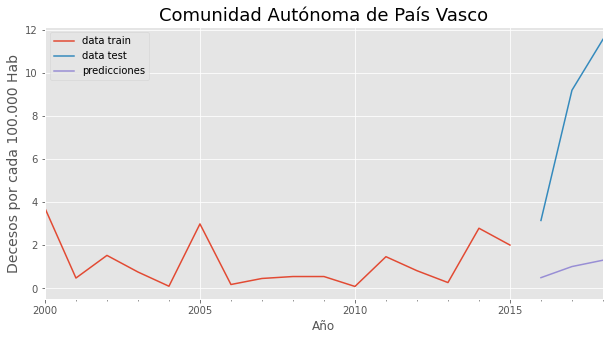

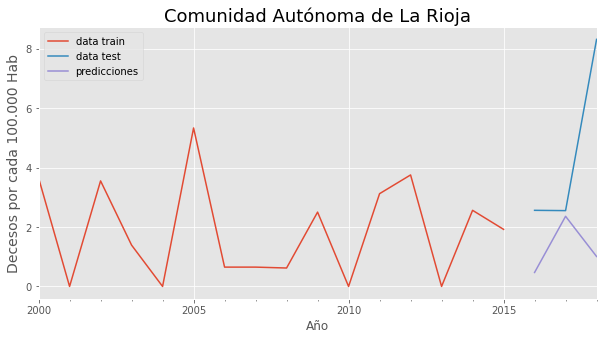

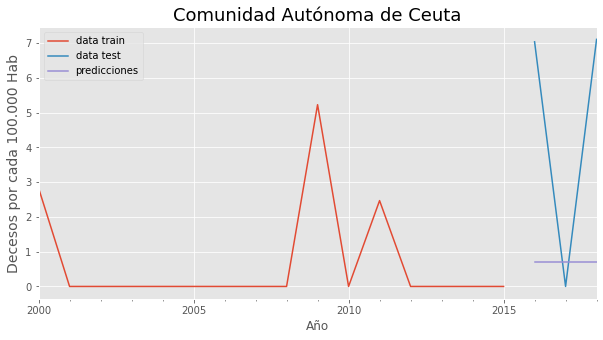

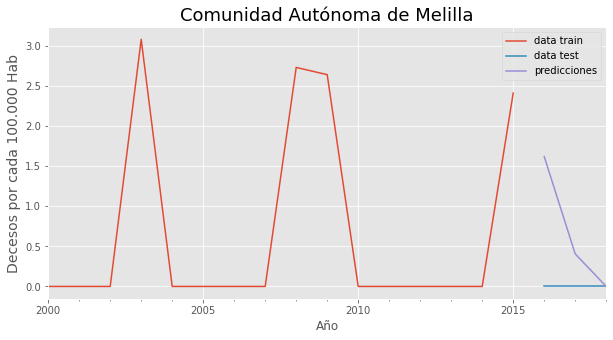

In [ ]:
#Checking graphically predicted data
for col in decesos.columns:
  plt.style.use('ggplot')
  fig, ax=plt.subplots(figsize=(10, 5))
  ax.set_title("Comunidad Autónoma de " + str(col), fontsize=18, fontfamily='Verdana')
  ax.set_ylabel('Decesos por cada 100.000 Hab', fontsize=14, fontfamily='Verdana')
  decesos_train[col].plot(ax=ax, label='data train')
  decesos_test[col].plot(ax=ax, label='data test')
  pred_T[col].plot(ax=ax, label='predicciones') 
  ax.legend();



In [ ]:
#Error between test data and predicted data
for col in decesos.columns:
  error_mse = mean_squared_error(
                y_true = decesos_test[col],
                y_pred = pred_T[col]
            )
  print(f"Error de test (mse): {error_mse}")



Error de test (mse): 14.548245610000007
Error de test (mse): 18.786109216666674
Error de test (mse): 22.061745923333334
Error de test (mse): 24.59649636333333
Error de test (mse): 10.082040366666666
Error de test (mse): 82.10423727000001
Error de test (mse): 36.090841979999986
Error de test (mse): 24.820389869999985
Error de test (mse): 19.813698536666664
Error de test (mse): 35.86382857666667
Error de test (mse): 1.6617870333333349
Error de test (mse): 31.494246779999997
Error de test (mse): 4.988946296666664
Error de test (mse): 43.32314004666667
Error de test (mse): 19.773889646666706
Error de test (mse): 59.60988123000002
Error de test (mse): 19.24364487
Error de test (mse): 27.185250858223867
Error de test (mse): 0.9293833123179224


In [ ]:
impotancia = forecaster_rf.get_feature_importances()
dict(zip(forecaster_rf.lags, impotancia))

{1: 0.3878739576984986, 2: 0.274028915868432, 3: 0.33809712643306933}

## Comparing with other stats models

In [ ]:
!pip install statsmodels

In [ ]:
pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
lags = 3
for col in decesos.columns:
  modelo_ar = AutoReg(decesos_train[col], lags=lags)
  res = modelo_ar.fit()
  predicciones_statsmodels = res.predict(start=decesos_test.index[0], end=decesos_test.index[-1])
  regressor = LinearRegression()
  forecaster = ForecasterAutoreg(regressor=regressor, lags=lags)
  forecaster.fit(y=decesos_train[col])
  predicciones_forecaster = forecaster.predict(steps=3)
  print(predicciones_statsmodels.values)
  print(predicciones_forecaster)
  print(np.allclose(predicciones_statsmodels.values, predicciones_forecaster))
  print(np.allclose(res.params.values[1:], forecaster.get_coef()))

2021-05-25 21:38:31,920 numexpr.utils INFO  NumExpr defaulting to 2 threads.


[-0.07206437  0.21710361  1.00246226]
[-0.07206437  0.21710361  1.00246226]
True
True
[0.98466944 1.13612202 1.90091168]
[0.98466944 1.13612202 1.90091168]
True
True
[1.6003345  2.55844726 1.78946485]
[1.6003345  2.55844726 1.78946485]
True
True
[ 0.86927249 -0.3087331  -0.09116515]
[ 0.86927249 -0.3087331  -0.09116515]
True
True
[0.92096117 0.71032148 0.76149409]
[0.92096117 0.71032148 0.76149409]
True
True
[0.49100191 0.37091418 0.71789518]
[0.49100191 0.37091418 0.71789518]
True
True
[0.61835775 0.78192464 1.49627447]
[0.61835775 0.78192464 1.49627447]
True
True
[0.67175694 1.21535691 1.25008741]
[0.67175694 1.21535691 1.25008741]
True
True
[0.43703237 1.41925627 1.70111555]
[0.43703237 1.41925627 1.70111555]
True
True
[-0.15127293  0.16693543  1.06508841]
[-0.15127293  0.16693543  1.06508841]
True
True
[0.24767491 0.46232753 0.99634313]
[0.24767491 0.46232753 0.99634313]
True
True
[1.3207768  1.38055267 1.39215149]
[1.3207768  1.38055267 1.39215149]
True
True
[0.20533627 0.51229473

# Average annual temperature as exogenous variable

In [ ]:
#Uploading Climate Data
climatical_data = pd.read_csv('Tmed2000_2018.csv')
climatical_data

,provincia,fecha,tmed,prec,velmedia
0,SEVILLA,2000-01-01,"10,8","0,0","3,1"
1,SEVILLA,2000-01-02,"9,9","0,0","1,9"
2,SEVILLA,2000-01-03,"8,8","0,0","1,7"
3,SEVILLA,2000-01-04,"10,3","0,0","3,9"
4,SEVILLA,2000-01-05,"10,4","0,0","2,2"
...,...,...,...,...,...
109007,MELILLA,2018-12-28,"14,4","0,0","1,1"
109008,MELILLA,2018-12-29,"14,8","0,0","3,3"
109009,MELILLA,2018-12-30,"15,1","0,0","5,3"
109010,MELILLA,2018-12-31,"14,2","0,0","2,5"


In [ ]:
#Dropping precipitations and average wing velocity
Tmed = climatical_data.drop(['prec','velmedia'], axis=1)
Tmed = Tmed.dropna()
Tmed

,provincia,fecha,tmed
0,SEVILLA,2000-01-01,"10,8"
1,SEVILLA,2000-01-02,"9,9"
2,SEVILLA,2000-01-03,"8,8"
3,SEVILLA,2000-01-04,"10,3"
4,SEVILLA,2000-01-05,"10,4"
...,...,...,...
109006,MELILLA,2018-12-27,"14,1"
109007,MELILLA,2018-12-28,"14,4"
109008,MELILLA,2018-12-29,"14,8"
109009,MELILLA,2018-12-30,"15,1"


In [ ]:
#Since climate data uses povinces' names, these must be replaced by CA's names respectively
Tmed.provincia.unique()

array(['SEVILLA', 'ZARAGOZA', 'ASTURIAS', 'ILLES BALEARS', 'VALLADOLID',
       'TOLEDO', 'BARCELONA', 'VALENCIA', 'BADAJOZ', 'A CORUÑA', 'MADRID',
       'MURCIA', 'NAVARRA', 'LA RIOJA', 'CEUTA', 'MELILLA', 'provincia'],
      dtype=object)

In [ ]:
#Creting new column named "CA" based on provinces name
def set_values(row, value):
  return value[row]
   
map_dictionary ={"SEVILLA" : "Andalucía", "ZARAGOZA" :"Aragón",
                 "ASTURIAS" : "Asturias","ILLES BALEARS":"Baleares",
                 "VALLADOLID":"CyL",
                 "TOLEDO":"CLM", "BARCELONA": "Cataluña", 
                 "VALENCIA": "CValenciana", "BADAJOZ": "Extremadura",
                 "A CORUÑA": "Galicia", "MADRID": "Madrid", "MURCIA": "Murcia",
                 "NAVARRA": "Navarra", "LA RIOJA": "La Rioja", "CEUTA": "Ceuta",
                 "MELILLA": "Melilla", "provincia": "Provincia"} 
   
Tmed['CA'] = Tmed['provincia'].apply(set_values, args =(map_dictionary, )) 

In [ ]:
#Fecha to datetime in year format
Tmed = pd.DataFrame(Tmed)
Tmed['fecha'] = pd.to_datetime(Tmed['fecha'], errors='coerce').dt.year

Tmed

,provincia,fecha,tmed,CA
0,SEVILLA,2000.0,"10,8",Andalucía
1,SEVILLA,2000.0,"9,9",Andalucía
2,SEVILLA,2000.0,"8,8",Andalucía
3,SEVILLA,2000.0,"10,3",Andalucía
4,SEVILLA,2000.0,"10,4",Andalucía
...,...,...,...,...
109006,MELILLA,2018.0,"14,1",Melilla
109007,MELILLA,2018.0,"14,4",Melilla
109008,MELILLA,2018.0,"14,8",Melilla
109009,MELILLA,2018.0,"15,1",Melilla


In [ ]:
#Altering column order
Tmed = Tmed[['fecha', 'CA', 'tmed', 'provincia']]
Tmed

,fecha,CA,tmed,provincia
0,2000.0,Andalucía,"10,8",SEVILLA
1,2000.0,Andalucía,"9,9",SEVILLA
2,2000.0,Andalucía,"8,8",SEVILLA
3,2000.0,Andalucía,"10,3",SEVILLA
4,2000.0,Andalucía,"10,4",SEVILLA
...,...,...,...,...
109006,2018.0,Melilla,"14,1",MELILLA
109007,2018.0,Melilla,"14,4",MELILLA
109008,2018.0,Melilla,"14,8",MELILLA
109009,2018.0,Melilla,"15,1",MELILLA


In [ ]:
#Replacing comma by points in decimal notation
Tmed['tmed'] = [x.replace(',', '.') for x in Tmed['tmed']]
Tmed

,fecha,CA,tmed,provincia
0,2000.0,Andalucía,10.8,SEVILLA
1,2000.0,Andalucía,9.9,SEVILLA
2,2000.0,Andalucía,8.8,SEVILLA
3,2000.0,Andalucía,10.3,SEVILLA
4,2000.0,Andalucía,10.4,SEVILLA
...,...,...,...,...
109006,2018.0,Melilla,14.1,MELILLA
109007,2018.0,Melilla,14.4,MELILLA
109008,2018.0,Melilla,14.8,MELILLA
109009,2018.0,Melilla,15.1,MELILLA


In [ ]:
#Tmed average as numeric
Tmed['tmed'] = pd.to_numeric(Tmed['tmed'], errors='coerce')
Tmed

,fecha,CA,tmed,provincia
0,2000.0,Andalucía,10.8,SEVILLA
1,2000.0,Andalucía,9.9,SEVILLA
2,2000.0,Andalucía,8.8,SEVILLA
3,2000.0,Andalucía,10.3,SEVILLA
4,2000.0,Andalucía,10.4,SEVILLA
...,...,...,...,...
109006,2018.0,Melilla,14.1,MELILLA
109007,2018.0,Melilla,14.4,MELILLA
109008,2018.0,Melilla,14.8,MELILLA
109009,2018.0,Melilla,15.1,MELILLA


In [ ]:
#Grouping data by year and CA and then Calculating annual average Tmed 
Tmed = Tmed.groupby(['fecha','CA'])['tmed'].mean()
Tmed

fecha   CA       
2000.0  Andalucía    19.520492
        Aragón       15.807377
        Asturias     13.313661
        Baleares     16.712295
        CLM          15.821585
                       ...    
2018.0  La Rioja     14.431233
        Madrid       15.025479
        Melilla      19.061644
        Murcia       19.692877
        Navarra      14.022740
Name: tmed, Length: 301, dtype: float64

In [ ]:
#DataFrame
Tmed_df = pd.DataFrame(Tmed)
Tmed_df

tmed
fecha  CA                  
2000.0 Andalucía  19.520492
       Aragón     15.807377
       Asturias   13.313661
       Baleares   16.712295
       CLM        15.821585
...                     ...
2018.0 La Rioja   14.431233
       Madrid     15.025479
       Melilla    19.061644
       Murcia     19.692877
       Navarra    14.022740

[301 rows x 1 columns]

In [ ]:
#Saving as Csv
Tmed_df.reset_index(['fecha', 'CA']).to_csv('Tmed_by_year.csv')

In [ ]:
Tmed_data = pd.read_csv('Tmed_by_CA.csv', sep=';', encoding = "ISO-8859-1")
Tmed_data

,Año,Andalucía,Aragón,Asturias,Baleares,CLM,CValenciana,Cataluña,CyL,Extremadura,Galicia,La Rioja,Madrid,Melilla,Murcia,Navarra,Unnamed: 16
0,2000,"19,5204918","15,80737705","13,3136612","16,71229508","15,8215847","18,29781421","17,01195335","18,72540984","12,70027322","17,34171429","13,30381232","14,03415301","14,17677596","18,72540984","18,7557377","13,29863388"
1,2001,"19,66","15,85863014","13,19205479","16,98760331","16,03123288","18,58958904","17,40612813","19,25342466","12,86027397","17,53401163","13,51705882","14,19780822","13,8690411","19,25342466","19,24684932","13,15232877"
2,2002,"19,58088643","15,92438356","13,55917808","16,9489011","16,08712329","18,14328767","17,27318436","18,99584488","13,20520548","17,87043189","13,59400631","14,36684932","14,25671233","18,99584488","18,85945205","13,37808219"
3,2003,"19,84164384","16,2709589","13,94054795","17,53643836","16,57561644","18,39671233","17,4660274","14,70273973","21,02363636","13,44356164","17,7022409","13,52861635","14,85232877","14,70273973","19,35972603","14,2892"
4,2004,"19,54098361","15,62595628","13,24344262","16,82431694","15,62759563","17,9931694","16,21149425","18,59826087","12,58278689","17,28319088","13,3169697","13,84234973","14,16229508","18,85819672","18,83333333","12,98743169"
5,2005,"19,53068493","15,27808219","13,31150685","16,3090411","15,92465753","17,15745856","16,7841791","18,23379888","12,83369863","17,08753463","13,73522727","13,7369863","14,89506849","18,48356164","18,5","12,82273973"
6,2006,"20,13561644","16,42082192","13,93260274","17,56078431","16,79369863","17,97452055","19,58320611","18,68457143","13,50383562","17,59970845","14,37746914","14,73643836","15,86363636","19,02438356","19,47013699","14,7008982"
7,2007,"19,49671233","15,5030137","13,12767123","16,97616438","15,38767123","17,28109589","17,64289941","18,43436533","12,25917808","16,53592814","13,79088319","14,02821918","14,40219178","18,7739726","18,81671233","13,00246575"
8,2008,"19,55819672","15,47240437","13,14672131","16,66448087","15,76202186","17,09287671","16,97067449","18,47207977","12,2057377","16,35242424","13,51666667","13,82213115","14,63002755","19,13989071","18,94699454","12,8147541"
9,2009,"20,37369863","16,41452055","13,25232877","17,01671233","16,72958904","17,22534435","17,65507246","18,93612717","13,46246575","17,85546218","14,06952663","14,60082192","15,6030137","19,62383562","19,41863014","13,5509589"


In [ ]:
#Replacing comma to point as decimal
for col in Tmed_data.iloc[:,1:]:
  Tmed_data[col] = [x.replace(',', '.') for x in Tmed_data[col]]
Tmed_data

,Año,Andalucía,Aragón,Asturias,Baleares,CLM,CValenciana,Cataluña,CyL,Extremadura,Galicia,La Rioja,Madrid,Melilla,Murcia,Navarra,Unnamed: 16
0,2000,19.5204918,15.80737705,13.3136612,16.71229508,15.8215847,18.29781421,17.01195335,18.72540984,12.70027322,17.34171429,13.30381232,14.03415301,14.17677596,18.72540984,18.7557377,13.29863388
1,2001,19.66,15.85863014,13.19205479,16.98760331,16.03123288,18.58958904,17.40612813,19.25342466,12.86027397,17.53401163,13.51705882,14.19780822,13.8690411,19.25342466,19.24684932,13.15232877
2,2002,19.58088643,15.92438356,13.55917808,16.9489011,16.08712329,18.14328767,17.27318436,18.99584488,13.20520548,17.87043189,13.59400631,14.36684932,14.25671233,18.99584488,18.85945205,13.37808219
3,2003,19.84164384,16.2709589,13.94054795,17.53643836,16.57561644,18.39671233,17.4660274,14.70273973,21.02363636,13.44356164,17.7022409,13.52861635,14.85232877,14.70273973,19.35972603,14.2892
4,2004,19.54098361,15.62595628,13.24344262,16.82431694,15.62759563,17.9931694,16.21149425,18.59826087,12.58278689,17.28319088,13.3169697,13.84234973,14.16229508,18.85819672,18.83333333,12.98743169
5,2005,19.53068493,15.27808219,13.31150685,16.3090411,15.92465753,17.15745856,16.7841791,18.23379888,12.83369863,17.08753463,13.73522727,13.7369863,14.89506849,18.48356164,18.5,12.82273973
6,2006,20.13561644,16.42082192,13.93260274,17.56078431,16.79369863,17.97452055,19.58320611,18.68457143,13.50383562,17.59970845,14.37746914,14.73643836,15.86363636,19.02438356,19.47013699,14.7008982
7,2007,19.49671233,15.5030137,13.12767123,16.97616438,15.38767123,17.28109589,17.64289941,18.43436533,12.25917808,16.53592814,13.79088319,14.02821918,14.40219178,18.7739726,18.81671233,13.00246575
8,2008,19.55819672,15.47240437,13.14672131,16.66448087,15.76202186,17.09287671,16.97067449,18.47207977,12.2057377,16.35242424,13.51666667,13.82213115,14.63002755,19.13989071,18.94699454,12.8147541
9,2009,20.37369863,16.41452055,13.25232877,17.01671233,16.72958904,17.22534435,17.65507246,18.93612717,13.46246575,17.85546218,14.06952663,14.60082192,15.6030137,19.62383562,19.41863014,13.5509589


In [ ]:
for col in Tmed_data.columns:
  Tmed_data[col] = pd.to_numeric(Tmed_data[col], errors='coerce')


In [ ]:
Tmed_data['Año'] = pd.to_datetime(Tmed_data['Año'], format='%Y')

In [ ]:
Tmed_data

,Año,Andalucía,Aragón,Asturias,Baleares,CLM,CValenciana,Cataluña,CyL,Extremadura,Galicia,La Rioja,Madrid,Melilla,Murcia,Navarra,Unnamed: 16
0,2000-01-01,19.520492,15.807377,13.313661,16.712295,15.821585,18.297814,17.011953,18.725410,12.700273,17.341714,13.303812,14.034153,14.176776,18.725410,18.755738,13.298634
1,2001-01-01,19.660000,15.858630,13.192055,16.987603,16.031233,18.589589,17.406128,19.253425,12.860274,17.534012,13.517059,14.197808,13.869041,19.253425,19.246849,13.152329
2,2002-01-01,19.580886,15.924384,13.559178,16.948901,16.087123,18.143288,17.273184,18.995845,13.205205,17.870432,13.594006,14.366849,14.256712,18.995845,18.859452,13.378082
3,2003-01-01,19.841644,16.270959,13.940548,17.536438,16.575616,18.396712,17.466027,14.702740,21.023636,13.443562,17.702241,13.528616,14.852329,14.702740,19.359726,14.289200
4,2004-01-01,19.540984,15.625956,13.243443,16.824317,15.627596,17.993169,16.211494,18.598261,12.582787,17.283191,13.316970,13.842350,14.162295,18.858197,18.833333,12.987432
5,2005-01-01,19.530685,15.278082,13.311507,16.309041,15.924658,17.157459,16.784179,18.233799,12.833699,17.087535,13.735227,13.736986,14.895068,18.483562,18.500000,12.822740
6,2006-01-01,20.135616,16.420822,13.932603,17.560784,16.793699,17.974521,19.583206,18.684571,13.503836,17.599708,14.377469,14.736438,15.863636,19.024384,19.470137,14.700898
7,2007-01-01,19.496712,15.503014,13.127671,16.976164,15.387671,17.281096,17.642899,18.434365,12.259178,16.535928,13.790883,14.028219,14.402192,18.773973,18.816712,13.002466
8,2008-01-01,19.558197,15.472404,13.146721,16.664481,15.762022,17.092877,16.970674,18.472080,12.205738,16.352424,13.516667,13.822131,14.630028,19.139891,18.946995,12.814754
9,2009-01-01,20.373699,16.414521,13.252329,17.016712,16.729589,17.225344,17.655072,18.936127,13.462466,17.855462,14.069527,14.600822,15.603014,19.623836,19.418630,13.550959


In [ ]:
Tmed_data = Tmed_data.loc[:, ~Tmed_data.columns.str.contains('^Unnamed')]


In [ ]:
Tmed_data = Tmed_data.set_index('Año')

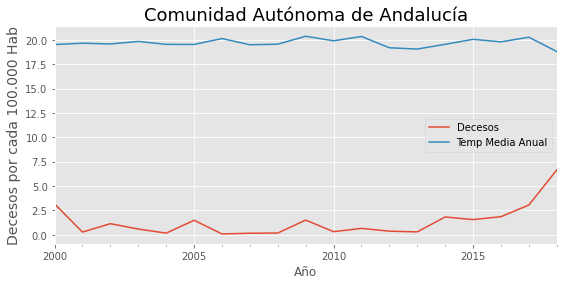

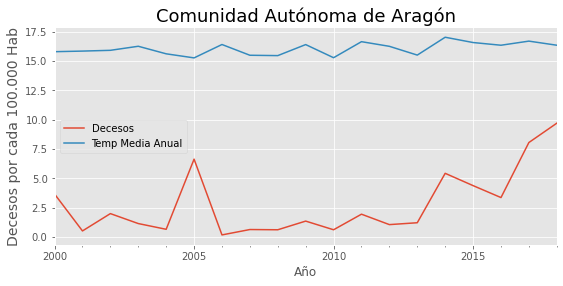

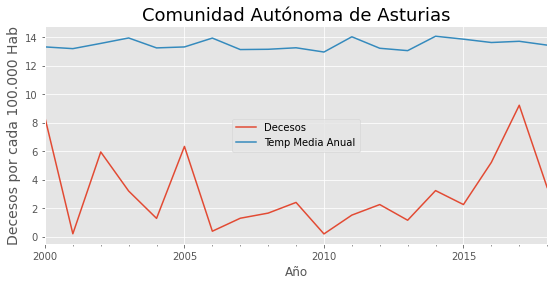

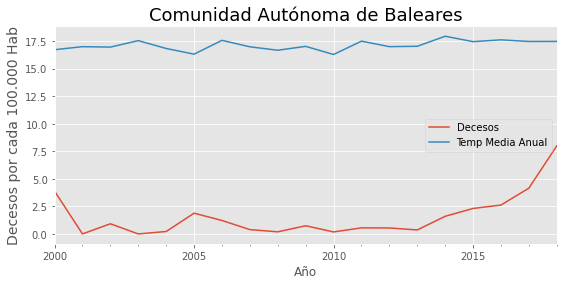

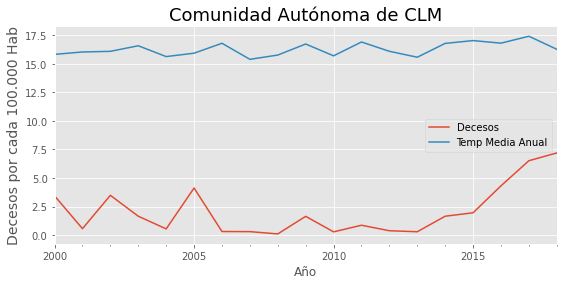

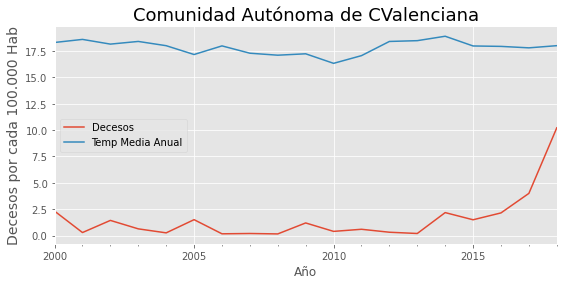

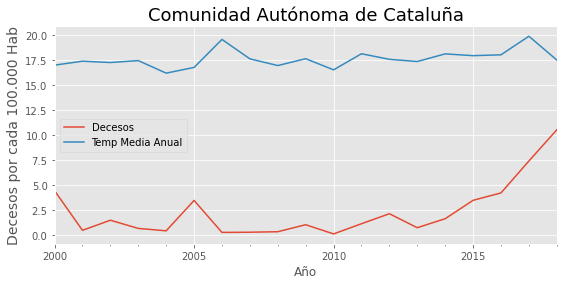

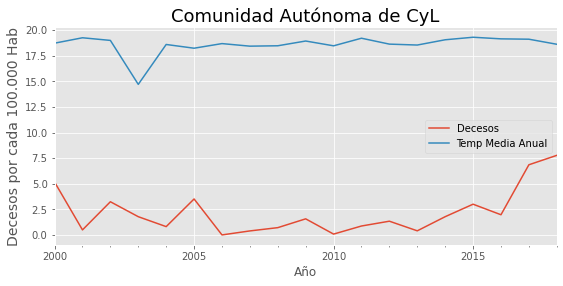

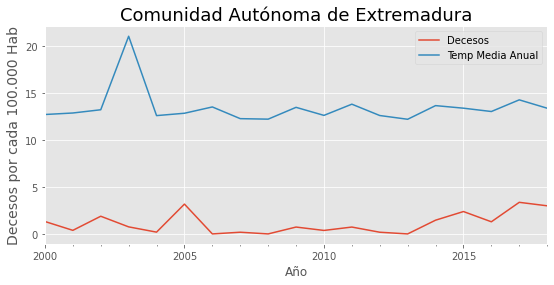

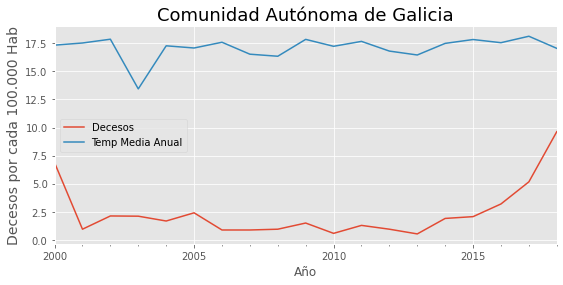

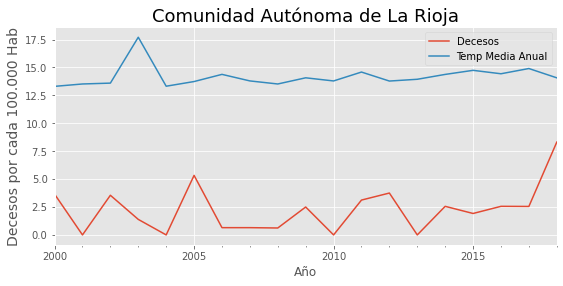

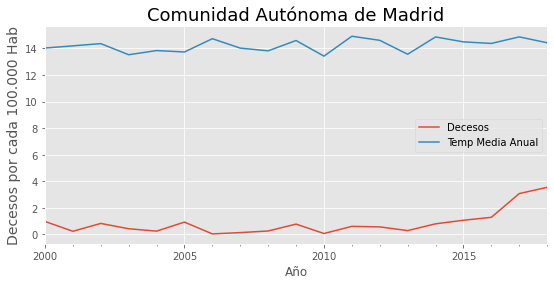

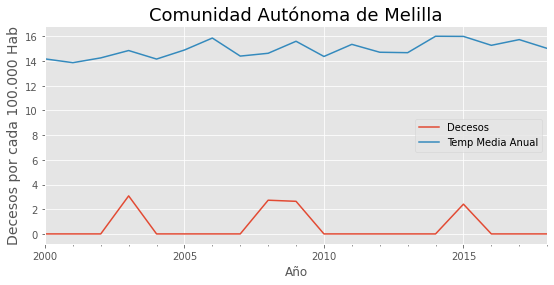

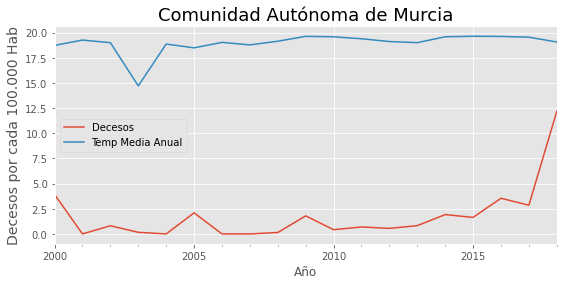

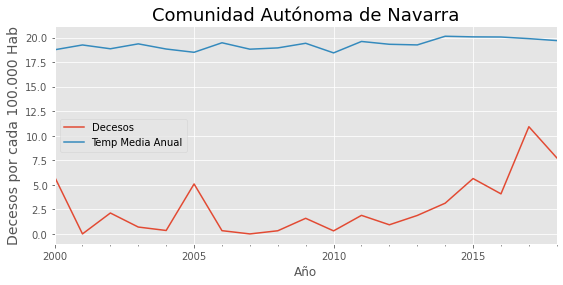

In [ ]:
for col in Tmed_data.columns:
  plt.style.use('ggplot')
  fig, ax = plt.subplots(figsize=(9, 4))
  ax.set_title("Comunidad Autónoma de " + str(col), fontsize=18, fontfamily='Verdana')
  ax.set_ylabel('Decesos por cada 100.000 Hab', fontsize=14, fontfamily='Verdana')
  decesos[col].plot(ax=ax, label='Decesos')
  Tmed_data[col].plot(ax=ax, label='Temp Media Anual')
  ax.legend();


In [ ]:
steps = 3

Tmed_train = Tmed_data[:-steps]
Tmed_test  = Tmed_data[-steps:]

In [ ]:
Tmed_train

,Andalucía,Aragón,Asturias,Baleares,CLM,CValenciana,Cataluña,CyL,Extremadura,Galicia,La Rioja,Madrid,Melilla,Murcia,Navarra
Año,,,,,,,,,,,,,,,
2000-01-01,19.520492,15.807377,13.313661,16.712295,15.821585,18.297814,17.011953,18.725410,12.700273,17.341714,13.303812,14.034153,14.176776,18.725410,18.755738
2001-01-01,19.660000,15.858630,13.192055,16.987603,16.031233,18.589589,17.406128,19.253425,12.860274,17.534012,13.517059,14.197808,13.869041,19.253425,19.246849
2002-01-01,19.580886,15.924384,13.559178,16.948901,16.087123,18.143288,17.273184,18.995845,13.205205,17.870432,13.594006,14.366849,14.256712,18.995845,18.859452
2003-01-01,19.841644,16.270959,13.940548,17.536438,16.575616,18.396712,17.466027,14.702740,21.023636,13.443562,17.702241,13.528616,14.852329,14.702740,19.359726
2004-01-01,19.540984,15.625956,13.243443,16.824317,15.627596,17.993169,16.211494,18.598261,12.582787,17.283191,13.316970,13.842350,14.162295,18.858197,18.833333
2005-01-01,19.530685,15.278082,13.311507,16.309041,15.924658,17.157459,16.784179,18.233799,12.833699,17.087535,13.735227,13.736986,14.895068,18.483562,18.500000
2006-01-01,20.135616,16.420822,13.932603,17.560784,16.793699,17.974521,19.583206,18.684571,13.503836,17.599708,14.377469,14.736438,15.863636,19.024384,19.470137
2007-01-01,19.496712,15.503014,13.127671,16.976164,15.387671,17.281096,17.642899,18.434365,12.259178,16.535928,13.790883,14.028219,14.402192,18.773973,18.816712
2008-01-01,19.558197,15.472404,13.146721,16.664481,15.762022,17.092877,16.970674,18.472080,12.205738,16.352424,13.516667,13.822131,14.630028,19.139891,18.946995


In [ ]:
# Creting and training forecaster
forecaster_exog = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=123),
                    lags      = 3
                )



In [ ]:
decesos.head()

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Cataluña,CLM,CyL,CValenciana,Extremadura,Galicia,Madrid,Murcia,Navarra,País Vasco,La Rioja,Ceuta,Melilla
Año,,,,,,,,,,,,,,,,,,,
2000-01-01,3.16,3.65,8.35,3.88,1.43,6.33,4.45,3.43,5.16,2.32,1.32,6.86,0.97,3.91,5.82,3.72,3.65,2.83,0.00
2001-01-01,0.27,0.50,0.20,0.00,0.59,0.74,0.49,0.56,0.49,0.29,0.38,0.94,0.23,0.00,0.00,0.48,0.00,0.00,0.00
2002-01-01,1.13,1.98,5.94,0.92,0.23,0.00,1.50,3.48,3.24,1.44,1.88,2.12,0.82,0.81,2.13,1.53,3.55,0.00,0.00
2003-01-01,0.58,1.13,3.20,0.00,0.22,0.36,0.68,1.65,1.78,0.64,0.75,2.10,0.42,0.16,0.70,0.76,1.39,0.00,3.08
2004-01-01,0.16,0.64,1.28,0.22,0.00,0.00,0.44,0.54,0.81,0.26,0.19,1.67,0.24,0.00,0.35,0.10,0.00,0.00,0.00


In [ ]:
decesos_2 = decesos.drop(['Canarias', 'Cantabria', 'País Vasco', 'Ceuta'], axis=1)

In [ ]:
steps = 3
decesos_train_2 = decesos_2[:-steps]
decesos_test_2  = decesos_2[-steps:]

### Normalization

In [ ]:
decesos_train_N = (decesos_train_2-decesos_train_2.min())/(decesos_train_2.max()-decesos_train_2.min())

NameError: ignored

In [ ]:
decesos_test_N = (decesos_test_2-decesos_test_2.min())/(decesos_test_2.max()-decesos_test_2.min())

In [ ]:
Tmed_test_N = (Tmed_test-Tmed_test.min())/(Tmed_test.max()-Tmed_test.min())
Tmed_train_N = (Tmed_train-Tmed_train.min())/(Tmed_train.max()-Tmed_train.min())

In [ ]:
decesos_test_N

In [ ]:
pred_exog=[]
for col in Tmed_train.columns:
  forecaster_exog.fit(decesos_train_N[col], Tmed_train_N[col])
  predicciones = forecaster_exog.predict(steps=steps, exog=Tmed_test_N[col])
  pred_exog.append(pd.Series(data=predicciones, index=Tmed_test.index))
  print(col)
  print(pd.Series(data=predicciones, index=decesos_test.index))


In [ ]:
pred_exog = pd.DataFrame(pred_exog, index=Tmed_data.columns)
pred_exog

In [ ]:
pred_exog_T = pred_exog.T
pred_exog_T

In [ ]:
# Graphic draw
for col in Tmed_data.columns:
  fig, ax=plt.subplots(figsize=(9, 4))
  decesos_train_N[col].plot(ax=ax, label='train')
  decesos_test_N[col].plot(ax=ax, label='test')
  pred_exog_T[col].plot(ax=ax, label='predicciones')
  ax.legend();


In [ ]:
# Error
for col in Tmed_data.columns:
  error_mse = mean_squared_error(
                y_true = decesos_test_2[col],
                y_pred = pred_exog_T[col]
            )
  print(f"Error de test (mse) {str(col)}: {error_mse}")




In [ ]:
%%shell
jupyter nbconvert --to html /content/ANN_Influenza.ipynb